# Dimensionnement de pompes de relevage et des tuyaux

## Étape 1 : calcul de la température en sortie de l'échangeur

In [3]:
T_f = 24 #température en sortie de l'échangeur

## Étape 2 : Calcul du débit volumique pour l'eau de mer et de l'eau douce

In [22]:
from estimation_debit_massique import debit

Entrez la surface des bureaux en m² :  23500
Entrez la surface vitrée en m² : 516


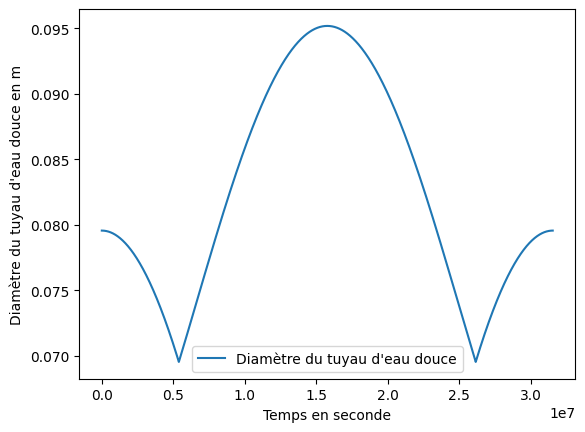

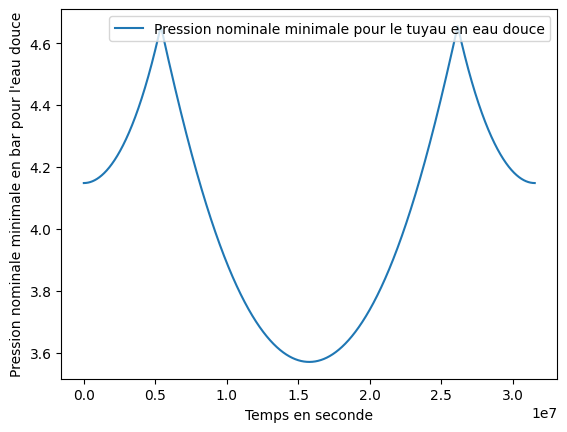

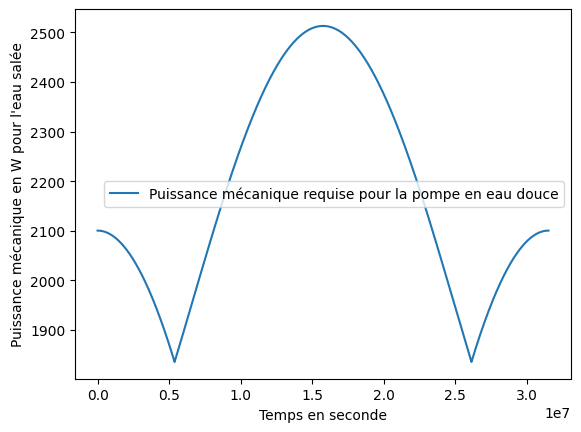

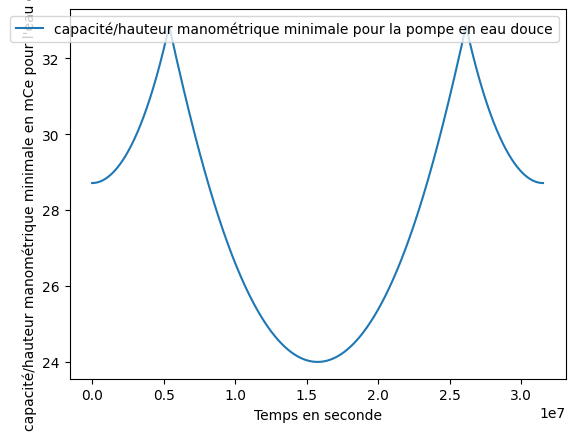

Entrez la surface des bureaux en m² :  23500
Entrez la surface vitrée en m² : 516


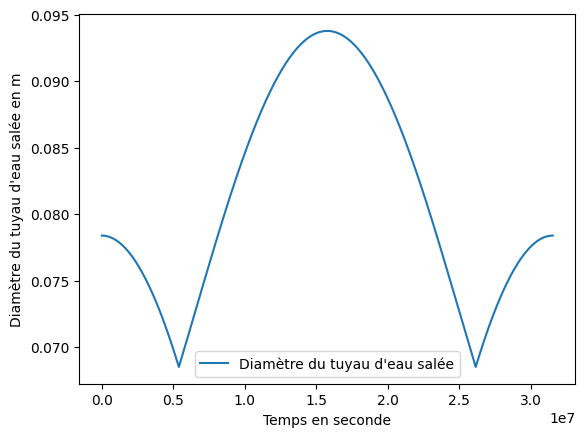

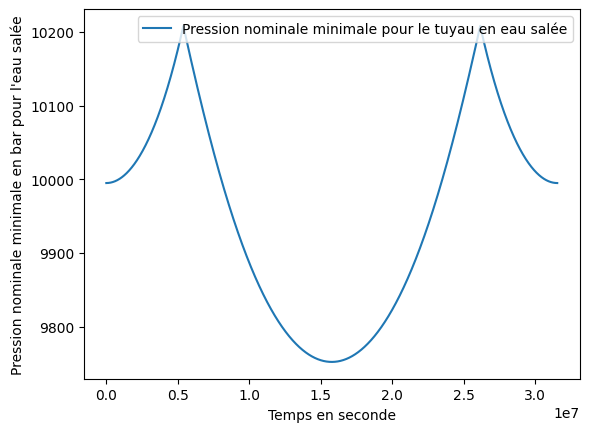

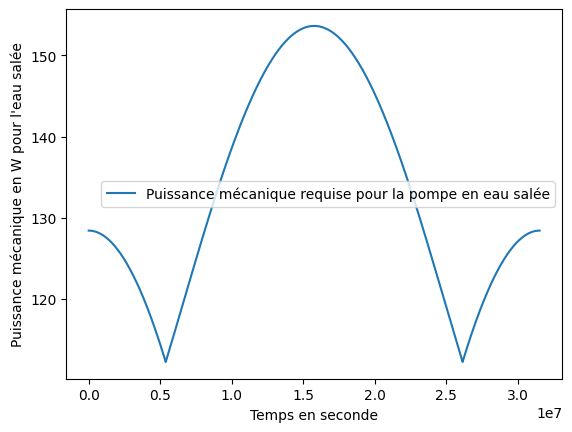

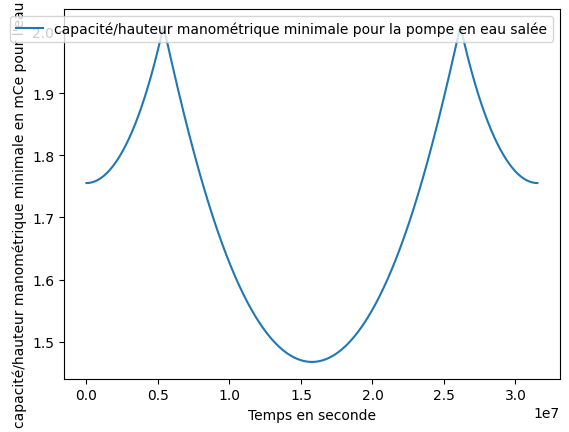

In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

g = 9.81
f = 0.012 # coefficient de frottement dans la loi de Darcy
r = 0.7 #le rendement de la pompe
V = 1.5 #m/s (fourchette haute de la vitesse silencieuse optimale)

def tuyaux(rho, V, L, h):
    #calcul du débit vol 
    debit_vol = debit()/rho
    #calcul du diamètre en fonction du debit_vol
    D = np.sqrt(4*debit_vol/(np.pi*V))
    #calcul des pertes de charges
    hf = f*L/D*V**2/(2*g)

    #calcul de la pression max
    Ps = rho*g*h
    Pd = 1/2*rho*V**2
    Pp = hf*rho*g
    Pmax = Ps + Pd + Pp

    PN_min = 1.25*Pmax # on veut une marge de sécurité d'au moins 25%
    P_meca = Pp*debit_vol # puissance hydraulique 
    capacite_min = hf # on veut que la capacité de la pompe soit grande devant les pertes

    return D, P_meca, PN_min, capacite_min, debit_vol

T = 365 * 24 * 3600  # Une année en secondes
X = np.linspace(0, T, 100000)

"""pour la pompe d'eau douce"""
rho_douce = 1000 #kg/m3
L_douce = 1660 #m
h_douce = 5 #m

D_douce, P_meca_douce,Pn_min_douce,capac_min_douce, debit_vol_douce = tuyaux(rho_douce, V, L_douce, h_douce)
plt.plot(X, D_douce, label="Diamètre du tuyau d'eau douce")
plt.xlabel('Temps en seconde')
plt.ylabel("Diamètre du tuyau d'eau douce en m")
plt.legend()
plt.show()

plt.plot(X, Pn_min_douce/(10**5), label="Pression nominale minimale pour le tuyau en eau douce")
plt.xlabel('Temps en seconde')
plt.ylabel("Pression nominale minimale en bar pour l'eau douce")
plt.legend()
plt.show()

plt.plot(X, P_meca_douce, label="Puissance mécanique requise pour la pompe en eau douce")
plt.xlabel('Temps en seconde')
plt.ylabel("Puissance mécanique en W pour l'eau salée")
plt.legend()
plt.show()

plt.plot(X, capac_min_douce, label="capacité/hauteur manométrique minimale pour la pompe en eau douce")
plt.xlabel('Temps en seconde')
plt.ylabel("capacité/hauteur manométrique minimale en mCe pour l'eau douce")
plt.legend()
plt.show()

"""pour la pompe d'eau salée"""
rho_sal = 1030 #kg/m3
L_sal = 100 #m
h_sal = 10 #m

D_sal, P_meca_sal, Pn_min_sal, capac_min_sal, debit_vol_sal = tuyaux(rho_sal, V, L_sal, h_sal)
plt.plot(X, D_sal, label="Diamètre du tuyau d'eau salée")
plt.xlabel('Temps en seconde')
plt.ylabel("Diamètre du tuyau d'eau salée en m")
plt.legend()
plt.show()

plt.plot(X, Pn_min_sal/(10^5), label="Pression nominale minimale pour le tuyau en eau salée")
plt.xlabel('Temps en seconde')
plt.ylabel("Pression nominale minimale en bar pour l'eau salée")
plt.legend()
plt.show()

plt.plot(X, P_meca_sal, label="Puissance mécanique requise pour la pompe en eau salée")
plt.xlabel('Temps en seconde')
plt.ylabel("Puissance mécanique en W pour l'eau salée")
plt.legend()
plt.show()

plt.plot(X, capac_min_sal, label="capacité/hauteur manométrique minimale pour la pompe en eau salée")
plt.xlabel('Temps en seconde')
plt.ylabel("capacité/hauteur manométrique minimale en mCe pour l'eau salée")
plt.legend()
plt.show()

Entrez la surface des bureaux en m² :  23226
Entrez la surface vitrée en m² : 516


Pression nominale minimale pour le tuyau en eau douce : 357587.1710526316


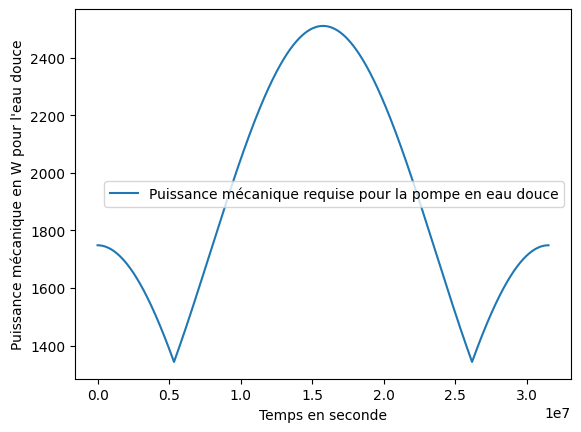

capacité/hauteur manométrique minimale en mCe pour l'eau douce : 24.04635441815548


Entrez la surface des bureaux en m² :  23226
Entrez la surface vitrée en m² : 516


Pression nominale minimale pour le tuyau en eau salée : 146048.24013157896


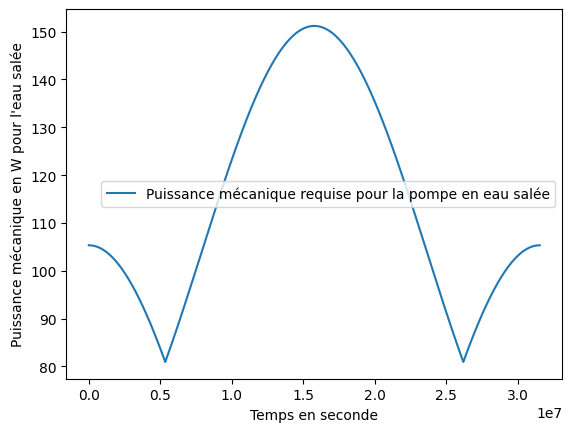

capacité/hauteur manométrique minimale en mCe pour l'eau salée : 1.448575567358764


In [42]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

g = 9.81
f = 0.012 # coefficient de frottement dans la loi de Darcy
r = 0.7 #le rendement de la pompe
V = 1.5 #m/s (fourchette haute de la vitesse silencieuse optimale)

def debit_vol(rho):
    #calcul du débit volumique
    return(debit()/rho)
    
def tuyaux(rho, V, L, h):
    #calcul du débit vol 
    debit = debit_vol(rho)
    #calcul du diamètre en fonction du debit_vol
    D = 0.095
    #calcul des pertes de charges
    hf = f*L/D*V**2/(2*g)

    #calcul de la pression max
    Ps = rho*g*h
    Pd = 1/2*rho*V**2
    Pp = hf*rho*g
    Pmax = Ps + Pd + Pp

    PN_min = 1.25*Pmax # on veut une marge de sécurité d'au moins 25%
    P_meca = Pp*debit # puissance hydraulique 
    capacite_min = hf # on veut que la capacité de la pompe soit grande devant les pertes

    return D, P_meca, PN_min, capacite_min, debit

T = 365 * 24 * 3600  # Une année en secondes
X = np.linspace(0, T, 100000)

"""pour la pompe d'eau douce"""
rho_douce = 1000 #kg/m3
L_douce = 1660 #m
h_douce = 5 #m

D_douce, P_meca_douce,Pn_min_douce,capac_min_douce, debit_vol_douce = tuyaux(rho_douce, V, L_douce, h_douce)
print(f'Pression nominale minimale pour le tuyau en eau douce : {Pn_min_douce}')

plt.plot(X, P_meca_douce, label="Puissance mécanique requise pour la pompe en eau douce")
plt.xlabel('Temps en seconde')
plt.ylabel("Puissance mécanique en W pour l'eau douce")
plt.legend()
plt.show()

print(f"capacité/hauteur manométrique minimale en mCe pour l'eau douce : {capac_min_douce}")

"""pour la pompe d'eau salée"""
rho_sal = 1030 #kg/m3
L_sal = 100 #m
h_sal = 10 #m

D_sal, P_meca_sal, Pn_min_sal, capac_min_sal, debit_vol_sal = tuyaux(rho_sal, V, L_sal, h_sal)

print(f'Pression nominale minimale pour le tuyau en eau salée : {Pn_min_sal}')

plt.plot(X, P_meca_sal, label="Puissance mécanique requise pour la pompe en eau salée")
plt.xlabel('Temps en seconde')
plt.ylabel("Puissance mécanique en W pour l'eau salée")
plt.legend()
plt.show()

print(f"capacité/hauteur manométrique minimale en mCe pour l'eau salée : {capac_min_sal}")